In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('reviews.csv')

In [ ]:
df_review =data.copy()
df_review.head()

,sku_id,user_id,rating,review_text,review_date
0,P0322,U5679,3.0,Decent for the price.,2024-11-22
1,P1059,U3760,4.0,Great value for money.,2024-10-21
2,P0625,U1008,4.0,Exceeded my expectations.,2023-11-19
3,P1142,U2632,4.0,Very satisfied with the quality.,2024-04-11
4,P0554,U1467,4.0,Highly recommend it!,2024-09-01


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19900 entries, 0 to 19899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku_id       19900 non-null  object 
 1   user_id      19900 non-null  object 
 2   rating       19684 non-null  float64
 3   review_text  19731 non-null  object 
 4   review_date  19685 non-null  object 
dtypes: float64(1), object(4)
memory usage: 777.5+ KB


In [ ]:
df_review.isnull().sum()

,0
sku_id,0
user_id,0
rating,216
review_text,169
review_date,215


In [ ]:
df_review['rating']=df_review['rating'].fillna(df_review['rating'].median())

In [ ]:
df_review['review_text']=df_review['review_text'].fillna("No review")

In [ ]:
df_review=df_review.dropna(subset=['review_date'])

In [ ]:
df_review.isnull().sum()


,0
sku_id,0
user_id,0
rating,0
review_text,0
review_date,0


In [ ]:
# data type formatting
data['review_date']=pd.to_datetime(df_review['review_date'], errors='coerce')

In [ ]:
#  any coercion resulted in more NaT
df_review['review_date'].isna().sum()

np.int64(0)

In [ ]:
# DUPLICATE identification
dup_rows = df_review.duplicated().sum()
print(dup_rows)

0


In [ ]:
# OUTLIERS IDENTIFICATION AND REMOVAL
print("Min rating:", df_review['rating'].min())
print("Max rating:", df_review['rating'].max())

Min rating: 1.0
Max rating: 5.0


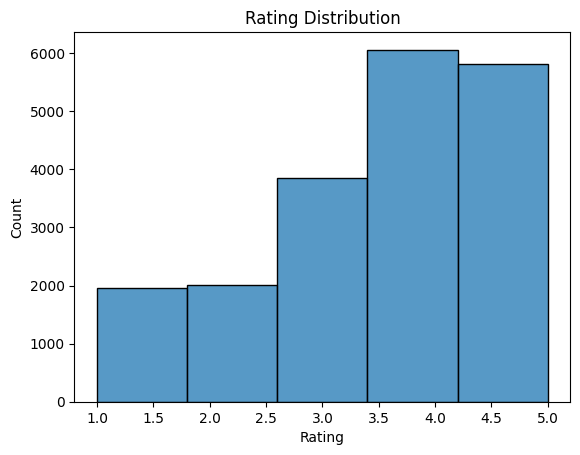

In [ ]:
sns.histplot(df_review['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
df_review['rating'].value_counts().sort_index()
#confirmation check

,count
rating,
1.0,1953
2.0,2017
3.0,3851
4.0,6059
5.0,5805


## SOME CHANGES CAN BE MADE LATER FOR HANDLING AND ANSWER DIFFERENT BUSINESS QUESTION. WE ARE PRETTY MUCH DONE HERE.

In [ ]:
df_review.to_csv('cleaned_reviews.csv', index=False)